# Assignment 2

We have decided to select a several quantitative features that should mainly show the distribution in forest cover type:
-	Elevation
-	Aspect
-	Slope
-	Horizontal distance to hydrology
-	Vertical distance to hydrology
-	Horizontal distance to roadways

Initialize required libraries and load data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean, std, sort, sqrt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

plt.figure(figsize=(12, 12))

trees = pd.read_csv('train.csv', index_col=0, delimiter=",")

df = trees[["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways"]]
X = df.as_matrix()

In [2]:
%matplotlib inline

### Main parameters for selected features:

In [3]:
print df.describe()

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

We'll apply Kmeans with the following pre-initialization methods and see the results:
1. No preinitialization
2. Standard scaling
3. MinMax scaling

Also, we'll use PCA method to decrease number of features to 2 and visualize kmeans results on charts. (To be honest, the data be slightly distorted by that operation, but visualization is usually the best way to understand the given data)

Here is the code of kmeans method and pre-initialization:

In [4]:
def apply_kmeans(K, X, X_2D, title = ''):
    kmeans = KMeans(n_clusters=K).fit(X)
    y_pred = kmeans.predict(X)
    
    plt.scatter(X_2D[:, 0], X_2D[:, 1], c = y_pred)
    plt.title(title)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    #plt.show()
    
    return {'kmeans' : kmeans, 'y_pred' : y_pred}

# Descrase number of features to 2 using PCA method
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

# Standard scaling
X_standard = StandardScaler().fit_transform(X)
X_2D_standard = pca.fit_transform(X_standard)

# MinMax scaling
X_minmax = MinMaxScaler().fit_transform(X)
X_2D_minmax = pca.fit_transform(X_minmax)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


### Lets apply kmeans with K = 3 and different pre-initialization methods

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


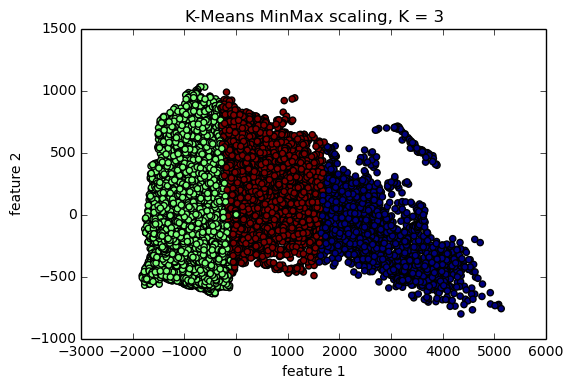

In [5]:
y_pred_no_3 = apply_kmeans(3, X, X_2D, 'K-Means, no pre-initialization, K = 3')
y_pred_standard_3 = apply_kmeans(3, X_standard, X_2D_standard, 'K-Means standard scaling, K = 3')
y_pred_minmax_3 = apply_kmeans(3, X_minmax, X_2D_minmax, 'K-Means MinMax scaling, K = 3 ')

### K-means with K = 5

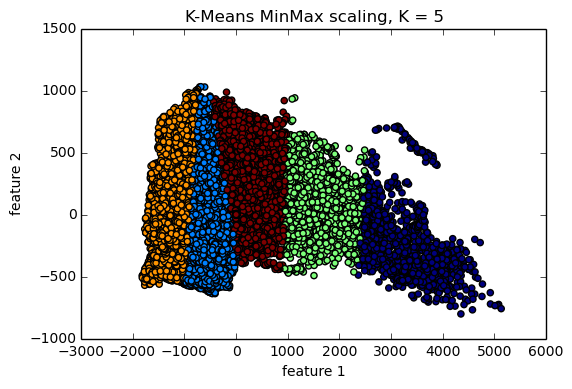

In [6]:
y_pred_no_5 = apply_kmeans(5, X, X_2D, 'K-Means no pre-initialization, K = 5')
y_pred_standard_5 = apply_kmeans(5, X_standard, X_2D_standard, 'K-Means standard scaling, K = 5')
y_pred_minmax_5 = apply_kmeans(5, X_minmax, X_2D_minmax, 'K-Means MinMax scaling, K = 5')

### K-means with K = 10

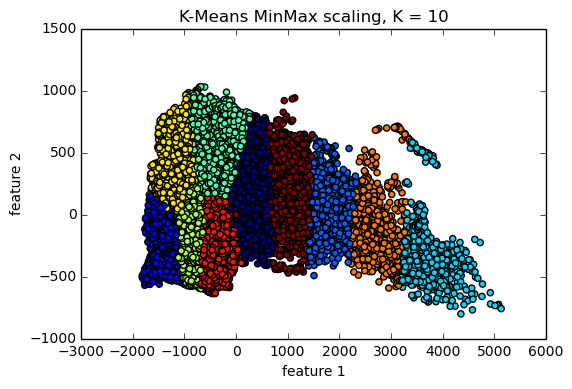

In [7]:
y_pred_no_10 = apply_kmeans(10, X, X_2D, 'K-Means no pre-initialization, K = 10')
y_pred_standard_10 = apply_kmeans(10, X_standard, X_2D_standard, 'K-Means standard scaling, K = 10')
y_pred_minmax_10 = apply_kmeans(10, X_minmax, X_2D_minmax, 'K-Means MinMax scaling, K = 10 ')

As we can see with growing of cluster numbers it become harder to get information from PCA-based charts, especially for scaled data. Also, K = 3 seems to provide the best results in term of clustering. (Clusters are divided into almost equal groups with exception of some groups having more outliers)

Lets compare K-Means no-pre initialization, K = 3 with grand-mean:

In [8]:
np.set_printoptions(precision=3)
compare_array = y_pred_no_3['kmeans'].cluster_centers_
compare_array = np.append(compare_array,[np.mean(X,axis = 0)], axis = 0)

headers = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways"]
df_compare = pd.DataFrame(data = compare_array, columns = headers)
df_compare.index += 1

print df_compare.head()

     Elevation      Aspect      Slope  Horizontal_Distance_To_Hydrology  \
1  3183.896414  171.673805  12.626494                        306.916833   
2  2512.045507  154.306251  18.427833                        188.296139   
3  3019.653741  154.525397  14.465079                        267.654649   
4  2749.322553  156.676653  16.501587                        227.195701   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  
1                       53.879980                      4444.836155  
2                       50.422661                       832.174443  
3                       51.090249                      2210.707029  
4                       51.076521                      1714.023214  


Row #4 represent the grand-mean. 

We can see from the grid that:
1. All features in cluster #3 is most differ from the grand mean. If we see on the visualizations above it will be clear that cluster #3 consist of the most number of outliers and lies on the border of dataset. 
2. Cluster #2 lies most closely to grand mean
3. The difference between the center of cluster #1 and grand mean is around 5-50% (depending on a feature). Even so, In general it lies closer to the grandmean than cluster #3
4. Aspect for cluster #1 and #2 is near the grandmean while for cluster #3 it's slightly different

Kmeans split the dataset into 3 clusters. One of them consist of the most number of outliers and center of one of clusters lies near the center of grandmean. 

# Assignment 3

In assignment #2 we have found an insteresting clustering with K = 3. Lets select the same clustering and the cluster with the most outliers for bootstrap (With N = 5000 means of random samples of X):

In [9]:
# Initialize variables
trees["cluster_number"] = y_pred_no_3['y_pred']

# Constant for bootstrap
N = 5000;

# Get cluster #2
cluster2 = df[trees["cluster_number"] == 2]

From comparing given cluster with grandmean we have found that "Aspect" feature show the only main difference, while other cluster has almost the same centers. Lets research "Aspect" feature using bootstrap. 

Prepare means list:

In [10]:
# Prepare means list
def getMeans(feature, N):
    feature_values = feature.values
    size = int(len(feature_values)/2)
    means = list()
    for i in range(N):
        means.append(mean(np.random.choice(feature_values, size)))
        
    return means
        
cluster_aspect = cluster2["Aspect"]
means = getMeans(cluster_aspect, N)

## Pivotal bootstrap (95% confidence)

Lets build borders and histogram for pivotal bootstrap.  

We'll generate 5000 samples. After that we'll find mean of means array (mean_pivotal) and standard deviation from means array (std_pivotal). Assuming Gaussian distribution on 95% level of confidence. 

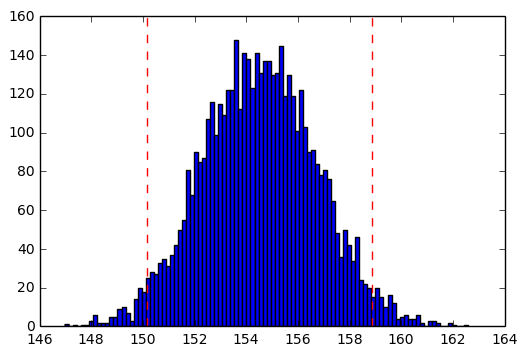

In [11]:
mean_pivotal = mean(means)
std_pivotal = std(means)

# Calculate borders
left = mean_pivotal - 1.96 * std_pivotal
right = mean_pivotal + 1.96 * std_pivotal
pivotal_borders = [left, right]

plt.hist(means, 100, color = 'blue')
plt.axvline(left, color='r', linestyle='dashed')
plt.axvline(right, color='r', linestyle='dashed')

#plt.show()

## Nonpivotal bootstrap

Lets build borders and histogram for nonpivotal bootstrap.  

We'll generate 5000 samples. After that we'll sort mean of means array and take 2.5% and 97.5% percentiles 
as the boundaries. (Assuming Gaussian distribution on 95% level of confidence)

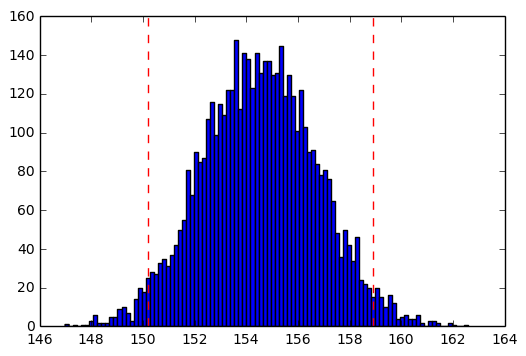

In [12]:
means_sorted = sort(means)

left = means_sorted[int(N * 0.025)]
right = means_sorted[int(N * 0.975)]
nonpivotal_borders = [left, right]

plt.hist(means_sorted, 100, color = 'blue')
plt.axvline(left, color='r', linestyle='dashed')
plt.axvline(right, color='r', linestyle='dashed')
#plt.show()

## Comparing of pivotal and nonpivotal bootstrap results

Result of pivotal and nonpivotal bootstrap:

In [13]:
print(pivotal_borders)
print(nonpivotal_borders)

[150.16234249396322, 158.85492299356511]
[150.20907029478457, 158.9201814058957]


As we can see the result of pivotal and nonpivotal borders for 95% level of confidence doesn't show big difference for "Aspect" feature. 

Lets compare means of current cluster with grand means. Assuming that selected feature has a Gaussian distribution for cluster and the whole dataset.

Calculate mean, std and length for feature "Aspect" of selected cluster and the whole dataset. (grand mean)

In [14]:
cluster_mean = mean(cluster_aspect)
cluster_len = cluster2.shape[0]
cluster_std = std(cluster_aspect)

grand_aspect = df["Aspect"]
grand_mean = mean(grand_aspect)
grand_len = df.shape[0]
grand_std = std(grand_aspect)
grand_means = getMeans(grand_aspect, N)

Since N = 5000 the left boundry of sorted sequence for 95% confidence interval will be equal: 0.05 * 5000 + 1 = 251. (Using nonpivotal bootstrap) We'll compare the within-means of "feature" with its grand-mean by subtraction of those arrays generated with bootstrap and build corresponding histograms.

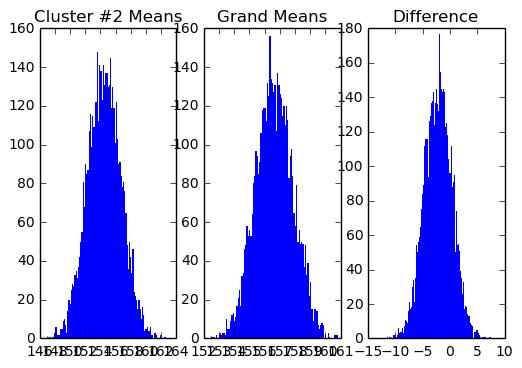

In [15]:
diff_means = np.subtract(means, grand_means)
conf_int = diff_means[251]; 
conf_int2 = cluster_mean - grand_mean - 1.65*sqrt(cluster_std/cluster_len+grand_std/grand_std)

f, (ax1, ax2, ax3) = plt.subplots(1, 3) 

ax1.hist(means, 100, color='blue', edgecolor='none')
ax2.hist(grand_means, 100, color='blue', edgecolor='none')
ax3.hist(diff_means, 100, color='blue', edgecolor='none')

ax1.set_title('Cluster #2 Means')
ax2.set_title('Grand Means')
ax3.set_title('Difference')

#plt.show()

In [16]:
print 'Left border confidence interval using bootstrap for difference within-means and grand mean of the feature: ' , conf_int
print 'Left border confidence interval calculated by testing for difference within-means and grand mean of the feature: ' , conf_int2

Left border confidence interval using bootstrap for difference within-means and grand mean of the feature:  -0.536205593348
Left border confidence interval calculated by testing for difference within-means and grand mean of the feature:  -3.82633134708


As we can see Aspect is bigger in selected cluster than in the grand mean.

# Assignment 4

### Выбрать или создать один-два номинальных признака на ваших данных. Во втором случае – объясните выбор кагегорий.

In [17]:
def add_nominal_column(df, prefix):
    if prefix in df:
        print("{} is already in df!".format(prefix))
        return
    try:
        df[prefix] = 0
        for column in df.columns:
            if column.startswith(prefix) and column != prefix:
                suffix = column[len(prefix):]
                number = int(suffix)
                assert str(number) == suffix
                df.loc[df[column] == 1, prefix] = number
        assert (df[prefix] == 0).sum() == 0
    except:
        del df[prefix]
        raise

In [18]:
add_nominal_column(trees, "Soil_Type")

In [19]:
np.unique(trees.Soil_Type, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40]),
 array([ 355,  623,  962,  843,  165,  650,    1,   10, 2142,  406,  227,
         476,  169,  114,  612,   60,   46,  139,   16,  345,  757,  257,
           1,   54,   15,    9, 1291,  725,  332,  690,  616,   22,  102,
          10,   34,  728,  657,  459]))

In [20]:
add_nominal_column(trees, "Wilderness_Area")

In [21]:
np.unique(trees.Wilderness_Area, return_counts=True)

(array([1, 2, 3, 4]), array([3597,  499, 6349, 4675]))

We choose feature "Wilderness_Area", because it has good number of classes and dataset contains enough objects for each class.

### Построить таблицу (таблицы) сопряжённости этого признака (этих признаков) с разбиением, полученным по методу к-средних.

We choose partition from applying K-means for 5 clusters with no pre-initialization.

In [22]:
y_pred_no_5 = y_pred_no_5['y_pred']
y_pred_no_5.shape, np.unique(y_pred_no_5, return_counts=True)

((15120,),
 (array([0, 1, 2, 3, 4], dtype=int32), array([1213, 4499, 1833, 4251, 3324])))

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
table = pd.crosstab(y_pred_no_5, trees.Wilderness_Area).as_matrix()
print table.shape
print table

(5, 4)
[[ 895    0  318    0]
 [ 357  123 1612 2407]
 [ 807    0 1026    0]
 [ 881  149  953 2268]
 [ 657  227 2440    0]]


### Рассчитать таблицу коэффициентов Кетле и прокомментировать выделяющиеся значения.

In [25]:
def quetelet_index(m):
    """Compute Quetelet index table and Quetelet correlation index
     Arguments:
       m(np.ndarray): сontingency table, shape = [num_clusters, num_actual_classes]
    """
    
    assert isinstance(m, np.ndarray)
    assert len(m.shape) == 2
    # p(row, column), shape = [num_rows, num_columns]
    probs = m / float(m.sum())

    # p(column), shape = [num_columns]
    column_priors = probs.sum(axis=0)
    assert len(column_priors.shape) == 1
    # p(column), shape = [1, num_columns]
    column_priors_expanded = column_priors[np.newaxis, :]
    assert (column_priors_expanded > 0).all()
    
    # p(column | rows), shape = [num_rows, num_columns]
    probs_given_rows = probs / probs.sum(axis=1)[:, np.newaxis]
    assert np.allclose(probs_given_rows.sum(axis=1), 1), (probs_given_rows, probs_given_rows.sum(axis=1))
    
    # 2.16, page 122
    # q(column | row) = (p(column | row) - p(column)) / p(column)
    q_table = (probs_given_rows - column_priors_expanded) / column_priors_expanded
    # 2.17, page 122
    q_index = (q_table * probs).sum()
    # 2.20, page 124
    chi_sq = q_index * m.sum()
    return q_table, q_index, chi_sq

In [26]:
print "contingency table:"
print table
print

q_table, q_index, chi_sq = quetelet_index(table)
print "Quetelet table:"
print q_table

contingency table:
[[ 895    0  318    0]
 [ 357  123 1612 2407]
 [ 807    0 1026    0]
 [ 881  149  953 2268]
 [ 657  227 2440    0]]

Quetelet table:
[[ 2.102 -1.    -0.376 -1.   ]
 [-0.666 -0.172 -0.147  0.73 ]
 [ 0.851 -1.     0.333 -1.   ]
 [-0.129  0.062 -0.466  0.726]
 [-0.169  1.069  0.748 -1.   ]]


-1 at i-th row and j-th column means that if object belongs to i-th cluster then it can't belong to j-th class.

2.10 at the first row and first column means that if object belongs to third cluster then it much more likely belongs to the first class (Rawah Wilderness Area).

### Рассчитать и проинтерпретировать сводный коэффициент Кетле и убедиться, что он совпадает с коэффициентом Пирсона фи-квадрат.

Using function from library:

In [27]:
import scipy.stats

In [28]:
scipy.stats.chi2_contingency(table)[0]

7105.9701945834895

Using our implementation:

In [29]:
def chi2_contingency_my(m):
    prob = m / float(m.sum())
    rows_priors = prob.sum(axis=1)[:, np.newaxis]
    cols_priors = prob.sum(axis=0)[np.newaxis, :]
    assert (rows_priors > 0).all()
    assert (cols_priors > 0).all()
    # 2.18, page 122
    return m.sum() * ( (prob - rows_priors * cols_priors)**2 / (rows_priors * cols_priors) ).sum()

In [30]:
chi2_contingency_my(table)

7105.9701945834895

In [31]:
print "chi-squared through Quetelet coefficients:", chi_sq

chi-squared through Quetelet coefficients: 7105.97019458


All estimations are close to each other.

### Рассчитать, при каком количестве объектов гипотеза независимости разбиения и признака должна быть отвергнута с 95% уровнем доверия. Прокомментировать.

In [32]:
def get_pvalue(y_clusters, y_nominal, num_objects):
    n = len(y_clusters)
    assert y_clusters.shape == (n,) and y_nominal.shape == (n,)
    
    np.random.seed(42)
    indices = np.random.permutation(n)[:num_objects]
    
    clusters = y_clusters[indices]
    nominal = y_nominal[indices]
    table = pd.crosstab(clusters, nominal)
    pvalue = scipy.stats.chi2_contingency(table)[1]
    return pvalue

Consider manual binary search (we are looking for number of objects when we obtain value less then 0.05):

In [33]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 1)

1.0

In [34]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 10000)

0.0

In [35]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 5000)

0.0

In [36]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 2000)

7.8114588612266276e-142

In [37]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 1000)

2.0791397559699485e-71

In [38]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 500)

2.2450358697447511e-28

In [39]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 250)

7.67725165255778e-13

In [40]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 100)

2.9568263957044971e-06

In [41]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 50)

0.0020792524051853126

In [42]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 20)

0.0056101017110965967

In [43]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 10)

0.38621156237464899

In [44]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 15)

0.06777193870455768

In [45]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 17)

0.016180034857914784

In [46]:
get_pvalue(y_pred_no_5, trees.Wilderness_Area, 16)

0.037945703575161062

16 objects!!! This is quite reasonable.

### Assignment 5

In [47]:
from sklearn.decomposition import PCA
from sklearn.decomposition.truncated_svd import TruncatedSVD
from scipy.linalg import svd

### In your data set, select 3-6 features related to the same aspect and explain your choice

To obtain one hidden factor we choose three features that correlates with each other ("Hillshade_9am", "Hillshade_3pm" and "Aspect").

To obtain two hidden factors we added two features that somewhat correlates with each other and less correlate with the first three features ("Slope" and "Elevation").

In [48]:
# return correlation coefficient between two features
def compare(df, feat1, feat2):
    return  scipy.stats.pearsonr(df[feat1], df[feat2])[0], \
        scipy.stats.spearmanr(df[feat1], df[feat2])[0]

In [49]:
print compare(trees, "Hillshade_9am", "Hillshade_3pm")
print compare(trees, "Hillshade_3pm", "Aspect")
print compare(trees, "Hillshade_9am", "Aspect")

features_1d = ["Hillshade_9am", "Hillshade_3pm", "Aspect"]

(-0.77996474244754466, -0.83565800130069112)
(0.63502236401987189, 0.62734447706372154)
(-0.59399742813131462, -0.41992732830945251)


In [50]:
print compare(trees, "Slope", "Elevation")

features_2d = features_1d + ["Slope", "Elevation"]

(-0.3126395018643281, -0.30772399937814598)


### Find the principal component representing the hidden factor and convert it to a 0-100 scale. Give an interpretation of the hidden factor. Explain your working.

Scale data to have in each feature min 0 and max 100.

In [51]:
data = trees[features_1d]
data = data - data.min(axis=0)
data = data / data.max(axis=0) * 100

In [52]:
data.head()

,Hillshade_9am,Hillshade_3pm,Aspect
Id,,,
1,87.007874,59.677419,14.166667
2,86.614173,60.887097,15.555556
3,92.125984,54.435484,38.611111
4,93.700787,49.193548,43.055556
5,86.614173,60.483871,12.500000


Calculate svd decomposition:

In [53]:
Z, Mu, C = svd(data, full_matrices=False)

In [54]:
print "singular values:", Mu

singular values: [ 13516.724   3915.671   1733.766]


Choose first component:

In [55]:
component=0
z, mu, c = Z[:, component], Mu[component], C[component, :]

In [56]:
mu, c, z[:10]

(13516.724089479885,
 array([-0.749, -0.507, -0.427]),
 array([-0.008, -0.008, -0.008, -0.008, -0.007, -0.008, -0.007, -0.007,
        -0.007, -0.007]))

In [57]:
c, z = -c, -z

Calculating normalizing constant:

In [58]:
alpha = 1 / c.sum()

Calculating hidden factor:

In [59]:
hidden_factor = data.dot(c.T) * alpha

Histogram of hidden factors (color represents cover types):

In [60]:
def plot_hidden_factor_hist(hidden_factor, df):
    cover_types = sorted(list(df['Cover_Type'].unique()))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for ct, c in zip(cover_types, colors):
        plt.hist(np.array(hidden_factor.loc[df['Cover_Type']==ct]),
                 alpha=.5, color=c, bins=100, label=str(ct), edgecolor = "none")
    plt.legend(loc="best")
    #plt.show()

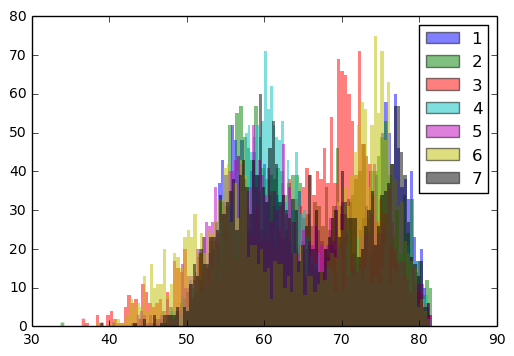

In [61]:
plot_hidden_factor_hist(hidden_factor, trees)

We can interpret hidden factor as similar to hillshade index at 3pm.

### Visualize the data with these features using SVD with two versions of normalization: (a) over ranges and (b) over standard deviations.

Apply svd to matrix with 5 features

In [62]:
data_2d = trees[features_2d]
Z, Mu, C = svd(data_2d, full_matrices=False)

In [63]:
Mu

array([ 343855.519,   14538.396,    5084.749,    4100.925,    1079.258])

In [64]:
components=[0,1]
z, mu, c = Z[:, components], Mu[components], C[components, :]
mu, c, z[:10]

(array([ 343855.519,   14538.396]),
 array([[-0.075, -0.048, -0.055, -0.006, -0.994],
        [-0.119,  0.297,  0.946,  0.008, -0.058]]),
 array([[-0.008, -0.006],
        [-0.008, -0.005],
        [-0.008, -0.001],
        [-0.008, -0.   ],
        [-0.008, -0.006],
        [-0.008, -0.001],
        [-0.008, -0.006],
        [-0.008, -0.006],
        [-0.008, -0.007],
        [-0.008, -0.006]]))

In [65]:
c, z = -c, -z

Find 2 components

In [66]:
factors = data_2d.dot(c.T  / np.sqrt(mu[np.newaxis, :]))

Plot this components on the plane (again color represents cover type).

In [67]:
def plot_hidden_factors_scatter(hidden_factors, df, loc="best"):
    cover_types = sorted(list(df['Cover_Type'].unique()))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for ct, c in zip(cover_types, colors):
        plt.scatter(hidden_factors[0].loc[df.Cover_Type==ct], hidden_factors[1].loc[df.Cover_Type==ct],
             alpha=.5, color=c,label=str(ct), edgecolor = "none")
    plt.legend(loc=loc)
    #plt.show()

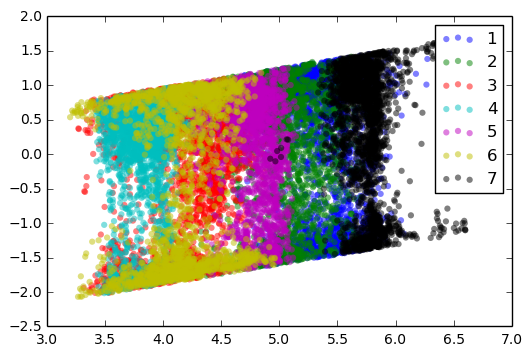

In [68]:
plot_hidden_factors_scatter(factors, trees)

Next, let's try to do this procedure for data with normalization over ranges:

In [69]:
def plot_2d_svd(data, df, loc="best"):
    Z, Mu, C = svd(data, full_matrices=False)
    # print Z.shape, Mu.shape, C.shape
    # print Mu
    assert all(Mu > 0)
    assert all(Mu[0] >= Mu)
    assert all(Mu[1] >= Mu[1:])
    components=[0,1]
    z, mu, c = Z[:, components], Mu[components], C[components, :]
    z, c = -z, -c
    # print c, z[:10]
    plot_hidden_factors_scatter(data.dot(c.T  / np.sqrt(mu[np.newaxis, :])), df, loc=loc)

normalize data over ranges:

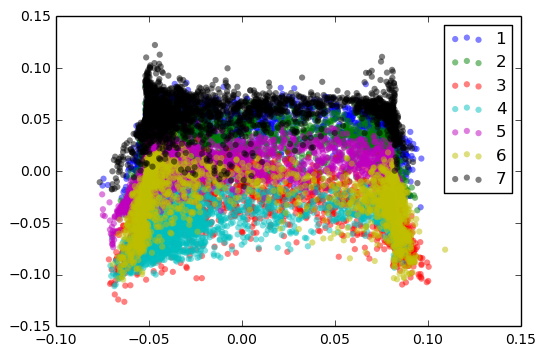

In [70]:
data_r = trees[features_2d]
data_r = (data_r - data_r.mean(axis=0)) / (data_r.max(axis=0) - data_r.min(axis=0))
plot_2d_svd(data_r, trees, loc=1)

And normalize over standard deviations:

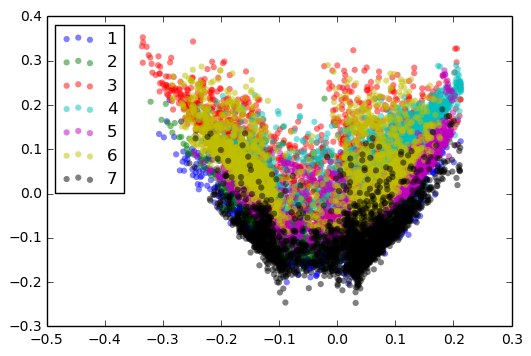

In [71]:
data_z = trees[features_2d]
data_z = (data_z - data_z.mean(axis=0)) / data_z.std(axis=0)
plot_2d_svd(data_z, trees, loc=2)

### Also, apply the conventional PCA for the visualization and see if there is any difference.

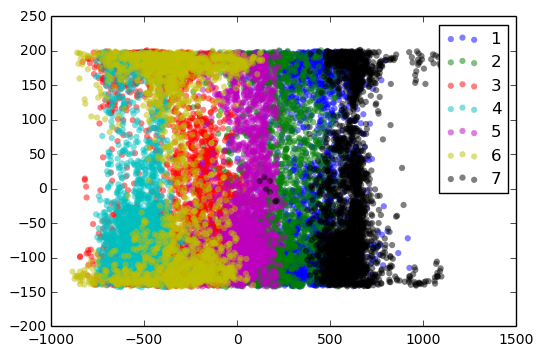

In [72]:
data_pca = trees[features_2d]
model = PCA(n_components=2)
model.fit(data_pca)
hidden_factors = model.transform(data_pca)
hidden_factors_df = pd.DataFrame(hidden_factors, index=trees.index)
plot_hidden_factors_scatter(hidden_factors_df, trees)

Similar to svd decomposition with centering but without any scaling:

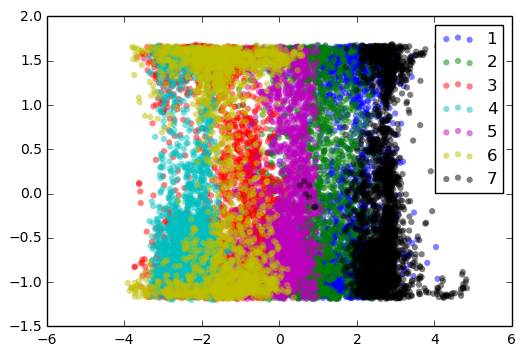

In [73]:
plot_2d_svd(data_pca - data_pca.mean(axis=0), trees)

### Comment on which of the normalizations is better and why.

We like svd decomposition with normalization over ranges because it's separate groups pretty good and coordinates are small.

But we think that for fair comparison it worth to apply this transformations in several tasks, calculate metrics and decide which is the best.

### Assignment 6

### Find two features in your dataset with more or less "linear-like" scatterplot.

In [74]:
compare(trees, 'Hillshade_9am', 'Hillshade_3pm')

(-0.77996474244754466, -0.83565800130069112)

"Hillshade_9am" and "Hillshade_3pm" have very high (anti)correlation coefficient.

### Display the scatter-plot

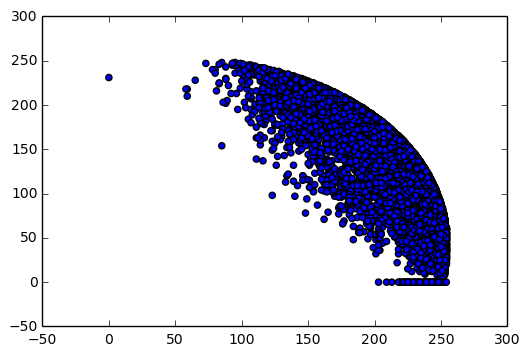

In [75]:
plt.scatter(trees.Hillshade_9am, trees.Hillshade_3pm)#, edgecolor = "none")

### Build a linear regression of one of them over the other. Make a comment on the meaning of the slope.

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
xx = trees.Hillshade_9am.as_matrix()
XX = xx[:, np.newaxis]
yy = trees.Hillshade_3pm.as_matrix()

In [78]:
model = LinearRegression()
model.fit(XX, yy)
pred = model.predict(XX)

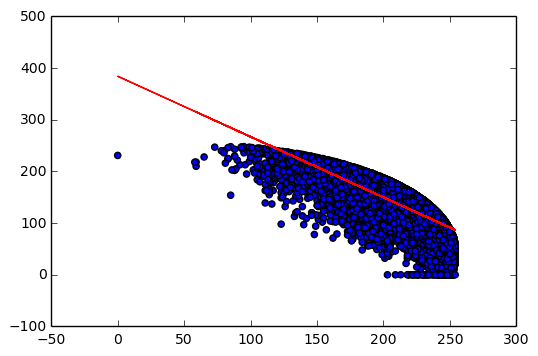

In [79]:
plt.scatter(XX[:, 0], yy)
plt.plot(XX, pred, color='r')

parameters of linear model:

In [80]:
model.coef_, model.intercept_

(array([-1.171]), 384.23389091652382)

### Find the correlation and determinacy coefficients and comment on the meaning of the latter.

Correlation coefficient:

In [81]:
corr = ((xx - xx.mean()) * (yy - yy.mean())).mean() / xx.std() / yy.std()
corr

-0.77996474244754466

Determinacy coefficient:

In [82]:
determinacy = 1 - ((yy - pred)**2).sum() / ((yy - yy.mean())**2).sum()
determinacy

0.60834499946126463

In [83]:
corr**2

0.60834499946126463

We see that determinacy coefficient is equal to squared correlation coefficient.

### Make a prediction of the target value, given two or three predictor' values; make a comment.

Initial data:

In [84]:
XX[:3]

array([[221],
       [220],
       [234]])

target value:

In [85]:
yy[:3]

array([148, 151, 135])

predicted value:

In [86]:
model.predict(XX[:3])

array([ 125.375,  126.546,  110.148])

Target and predicted values are somewhat close.

### Compare the relative absolute error of the regression on all points of your set and the determinacy coefficent and make comments.

Determinacy coefficient

In [87]:
determinacy

0.60834499946126463

mean absolute squared error:

In [88]:
((yy - pred)**2).mean()

824.91513441992413

variance of target variable:

In [89]:
yy.var()

2106.2290364867654

mean relative squared error

In [90]:
((yy - pred)**2 / (pred)**2).mean()

0.054697412273365643

We see that determinacy coefficient is equal to one minus (mean absolute squared error divided by variance of the target variable)

In [91]:
1 - ((yy - pred)**2).mean() / yy.var()

0.60834499946126463